<a href="https://colab.research.google.com/github/samarakoon-ryan/Grovers-Algorithm/blob/implement-quantum-circuit/implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of Grover's Algorithm using IBM Qiskit

## Install Dependencies

In [ ]:
# pip installs Qiskit
pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

In [10]:
pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

## 2 Qubit Example

We will be searching for |
w
⟩
 [3]

### Initialize the state

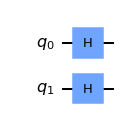

In [7]:
# We prepare a quantum circuit with 2 qubits
n = 2
grovers_circuit = QuantumCircuit(n)

# We then apply an H-gate to each qubit in order for it to get into 
# a superposition state. The default initial state is |0> so 
# H|0> = |+>

def initialize_superposition(qc, qubits):
    """Apply an H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

# The above function is used to initialize our circuit
grovers_circuit = initialize_superposition(grovers_circuit, [0,1])
grovers_circuit.draw(output='mpl')

### Oracle

- Oracle for  |ω⟩ = |11⟩

- This is essentially a controlled Z-gate, so for this example the oracle is simply the controlled Z-gate.
 

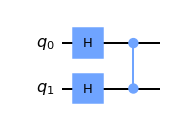

In [8]:
# Apply the Oracle
grovers_circuit.cz(0,1) # Z-gate that joins Qubit 0 and Qubit 1
grovers_circuit.draw(output='mpl')


### Diffuser

- We will apply the diffusion operator to both qubits.
- This includes an H-gate, Z-gate, controlled Z-gate, and another H-gate.

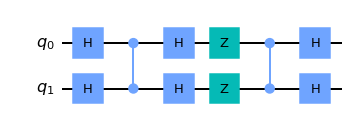

In [9]:
# Diffusion operator
grovers_circuit.h([0,1])
grovers_circuit.z([0,1])
grovers_circuit.cz(0,1)
grovers_circuit.h([0,1])
grovers_circuit.draw(output='mpl')

This is the finished circuit!